In [12]:
from pathlib import Path

import torch
import numpy as np
import scipy.special as sp
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from xxhash import xxh128


### Генерация новостей

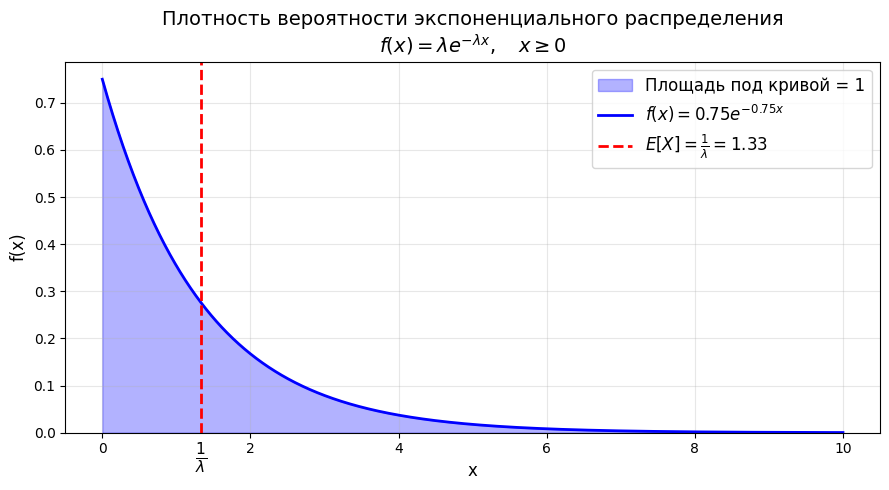

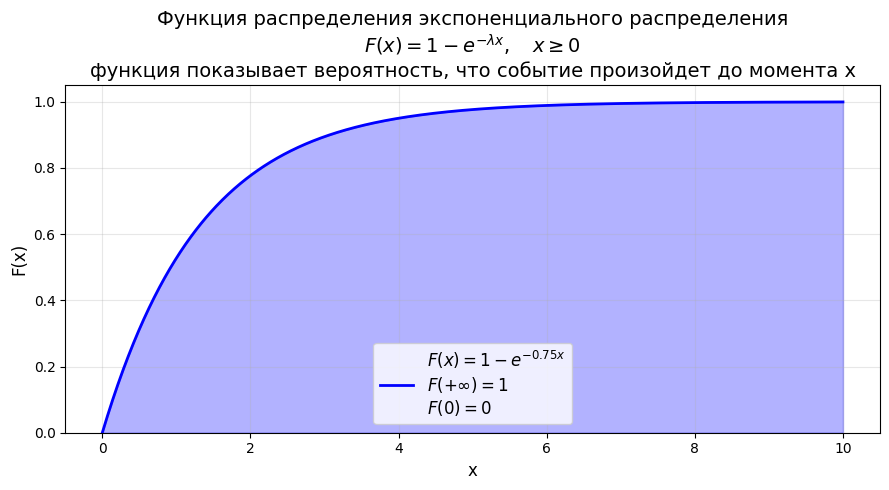

In [3]:
lambda_val = 0.75
x = np.linspace(0, 10, 1000)
pdf = lambda_val * np.exp(-lambda_val * x)
mean = 1 / lambda_val

plt.figure(figsize=(9, 5))
plt.fill_between(x, pdf, alpha=0.3, color='blue', label='Площадь под кривой = 1')

# График плотности
plt.plot(x, pdf, 'b-', linewidth=2, label=f'$f(x) = {lambda_val}e^{{-{lambda_val}x}}$')

# Вертикальная линия матожидания
plt.axvline(mean, color='red', linestyle='--', linewidth=2,
           label=f'$E[X] = \\frac{{1}}{{\\lambda}} = {mean:.2f}$')

# Подпись под матожиданием
plt.text(mean, -0.02, r'$\frac{1}{\lambda}$',
         fontsize=16, ha='center', va='top', transform=plt.gca().get_xaxis_transform(),
         #bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7)
         )

# Настройки графика
plt.title('Плотность вероятности экспоненциального распределения\n' +
          r'$f(x) = \lambda e^{-\lambda x},\quad x \geq 0$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


cdf = 1 - np.exp(-lambda_val * x)

plt.figure(figsize=(9, 5))
plt.fill_between(x, cdf, alpha=0.3, color='blue')

# График плотности
plt.plot(x, cdf, 'b-', linewidth=2, label=f'$F(x) = 1 - e^{{-{lambda_val}x}}$\n'+r'$F(+ \infty) = 1$'+'\n'+r'$F(0)=0$')


plt.title('Функция распределения экспоненциального распределения\n' +
          r'$F(x) = 1 - e^{-\lambda x},\quad x \geq 0$'+'\nфункция показывает вероятность, что событие произойдет до момента x', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

(10000, 3)


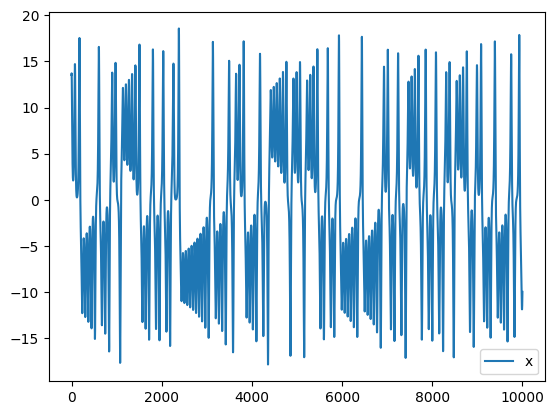

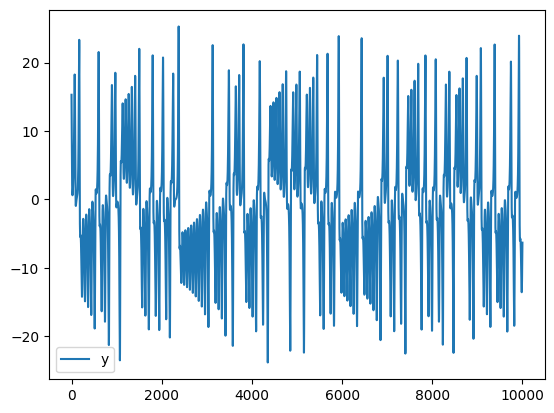

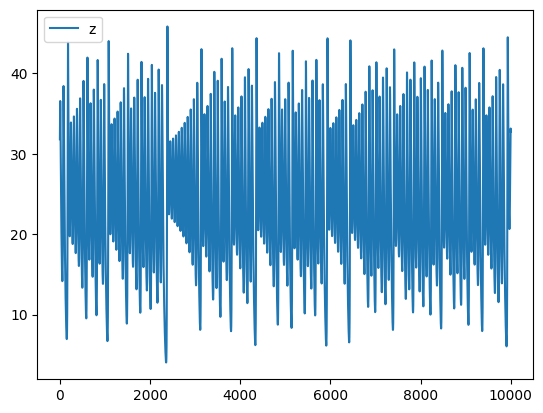

In [7]:
data = np.load('data/single_lorenz.npy')
print(data.shape)
plt.plot(data[:, 0], label='x')
plt.legend()
plt.show()
plt.plot(data[:, 1], label='y')
plt.legend()
plt.show()
plt.plot(data[:, 2], label='z')
plt.legend()
plt.show()

19.531642234025494 16.861758428699293
4.5474735088646414e-17
19.531642234025494 -16.861758428699293


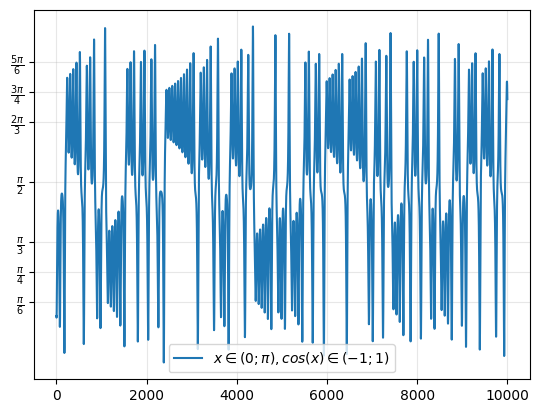

In [19]:
print(np.max(data[:, 0]), np.max(-data[:, 0]))
print(np.mean(data[:, 0]))
X = data[:, 0]
X -= np.mean(X)
X_max = np.max(X)
X_min = np.min(X)
print(X_max, X_min)
C = X_max*2 / np.pi
X = np.pi/2 - X / C

y_ticks = [np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi/2 + np.pi/3, np.pi/2 + np.pi/4, np.pi/2 + np.pi/6]
y_labels = [r'$\frac{\pi}{6}$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{3}$',
           r'$\frac{\pi}{2}$', r'$\frac{5\pi}{6}$', r'$\frac{3\pi}{4}$', r'$\frac{2\pi}{3}$']
plt.plot(X, label=r'$x \in (0; \pi), cos(x) \in (-1; 1)$')
plt.yticks(y_ticks, y_labels)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [13]:
x1 = 700
x2 = -100
c = 2**0.5 * x1*(x2-x1) / x2
r1 = 2**0.5 * x1
r2 = -2**0.5 * x1**2 / x2
z1 = r1**2 - x1**2
z2 = r2**2 - x1**2
theta1 = np.arcsin(x1/r1)
theta2 = np.arcsin(abs(x2)/r2)
alpha = theta1 + theta2

SyntaxError: invalid syntax (1747313182.py, line 5)

In [ ]:
alpha = np.deg2rad(40)  # фиксированный угол между X1 и X2 (в радианах)
nframes = 300           # количество кадров
T = 5                   # период (сек)
t = np.linspace(0, 2*np.pi, nframes)

# === законы изменения ===
# радиусы и углы колеблются
r1 = 1.0 + 0.3*np.sin(2*t)
r2 = 1.2 + 0.2*np.cos(3*t)
theta1 = np.pi/6 + 0.1*np.sin(1.5*t)
theta2 = alpha - theta1  # чтобы угол оставался постоянным
Phi = 0.5*np.sin(t)      # вращение вокруг оси Z (азимут общей плоскости)

# === координаты ===
def coords(r, theta, phi, sign=1):
    """ sign=+1 для X1, sign=-1 для X2 """
    x = sign * r * np.sin(theta) * np.cos(phi)
    y = sign * r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

x1, y1, z1 = coords(r1, theta1, Phi, +1)
x2, y2, z2 = coords(r2, theta2, Phi, -1)

# === настройка графика ===
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Oscillating points X1, X2 around OZ')

# точки и линия связи
point1, = ax.plot([], [], [], 'ro', markersize=8)
point2, = ax.plot([], [], [], 'bo', markersize=8)
line,   = ax.plot([], [], [], 'k--', lw=1)

# === функция обновления кадра ===
def update(i):
    point1.set_data([x1[i]], [y1[i]])
    point1.set_3d_properties([z1[i]])
    point2.set_data([x2[i]], [y2[i]])
    point2.set_3d_properties([z2[i]])
    line.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    line.set_3d_properties([z1[i], z2[i]])
    return point1, point2, line

# === анимация ===
ani = FuncAnimation(fig, update, frames=nframes, interval=40, blit=True)

plt.show()